In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Thesis_Simulation/Big eta/Zero alpha

Mounted at /content/gdrive
/content/gdrive/MyDrive/Thesis_Simulation/Big eta/Zero alpha


In [3]:
rounds = 100
vehicle_limit = 80
all_routes = [[0, 3], [0, 1], [2, 3], [2, 1]]

In [4]:
record = pd.read_csv(f'Saved_data/Simulation_records/Round_{rounds}.csv')
utility = pd.read_csv(f'Saved_data/Utility_data/Round_{rounds}.csv')

In [5]:
record

Vehicle_label Road_order  Total_time Leading_vehicles  \
0                 0     [2, 3]       67.75     [-999, -999]   
1                 1     [2, 1]       37.15        [0, -999]   
2                 2     [2, 1]       38.90           [1, 1]   
3                 3     [0, 3]       97.10       [-999, 18]   
4                 4     [2, 3]       69.20           [2, 0]   
...             ...        ...         ...              ...   
7995             75     [2, 3]      222.40         [73, 73]   
7996             76     [0, 1]      158.00         [74, 74]   
7997             77     [0, 1]      153.05         [76, 76]   
7998             78     [0, 1]      153.30         [77, 77]   
7999             79     [0, 3]      181.85         [78, 68]   

                  Stopped_time Stop_while_front  Round_number  
0                       [0, 0]           [0, 0]             1  
1                       [0, 0]           [0, 0]             1  
2                       [0, 0]           [0, 0]             1  
3                       [0, 0]           [0, 0]             1  
4                       [0, 0]           [0, 0]             1  
...                        ...              ...           ...  
7995    [27.00000000000025, 0]           [0, 0]           100  
7996  [0.49999999999999994, 0]           [0, 0]           100  
7997   [0.9500000000000003, 0]           [0, 0]           100  
7998   [1.1500000000000004, 0]           [0, 0]           100  
7999   [2.1500000000000004, 0]           [0, 0]           100  

[8000 rows x 7 columns]

In [6]:
record['Road_order'] = record.apply(lambda row: ast.literal_eval(row['Road_order']), axis=1)
record["Road_order_label"] = record.apply(lambda row: all_routes.index(row.Road_order), axis=1)

utility['Routes_taken'] = utility.apply(lambda row: ast.literal_eval(row['Routes_taken']), axis=1)

In [7]:
# time_df = pd.DataFrame(utility['Routes_taken'].to_list(), columns=range(rounds))
# print(time_df.shape)
# display(time_df.head(10))

In [8]:
time_df = pd.pivot_table(record, values='Total_time', 
                         index=['Road_order_label', 'Round_number'], 
                         aggfunc=np.mean).reset_index(drop=False)
time_df.loc[time_df.Road_order_label==1].sort_values('Round_number').Total_time.values

array([108.65      , 108.87777778, 125.625     , 109.46111111,
        93.53695652, 125.26666667, 125.8297619 , 133.94404762,
       134.5225    , 126.01891892, 124.21      , 134.575     ,
       122.87361111, 135.58536585, 124.81125   , 127.31666667,
       131.80405405, 126.97875   , 129.29625   , 118.40243902,
       122.33333333, 123.01625   , 135.2797619 , 134.09875   ,
       136.83289474, 133.84487179, 132.21914894, 144.05681818,
       115.303125  , 144.21136364, 131.55128205, 123.22765957,
       145.81707317, 131.72857143, 128.78292683, 127.94761905,
       118.6702381 , 129.80526316, 132.02386364, 124.084375  ,
       124.525     , 126.606     , 139.7       , 126.29756098,
       139.85641026, 132.17380952, 127.88461538, 133.59886364,
       130.41463415, 135.61707317, 131.91625   , 128.22      ,
       139.98589744, 141.06219512, 131.03125   , 133.20833333,
       135.325     , 126.63863636, 126.02959184, 133.92121212,
       138.38974359, 140.825     , 123.07738095, 128.52

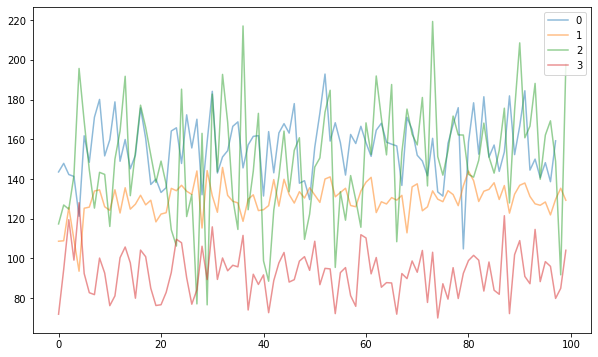

In [9]:
# Changes in average time needed to go through each route over time
plot_route_time = [[], [], [], []]

for i in range(4):
    times = time_df.loc[time_df.Road_order_label==i].sort_values('Round_number').Total_time.values
    plot_route_time[i]=times
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_route_time[i], label=str(i), alpha=0.5)
    
plt.legend()

In [10]:
time_df2 = pd.pivot_table(record, values='Total_time', index='Round_number', aggfunc=np.sum).reset_index(drop=False)
plt.plot(time_df2.Round_number, time_df2.Total_time)

In [11]:
time_df2.Total_time[-20:].mean()

9820.51249999998

In [12]:
utility

Vehicle_label                                          Utilities  \
0               0  [-13.877955243365705, -12.730398890226654, -12...   
1               1  [-104.24455749048218, -83.8436897564669, -72.7...   
2               2  [-48.59023629347631, -39.76451182084447, -36.4...   
3               3  [-16.648419818201084, -15.667349158119436, -15...   
4               4  [-52.54181200337792, -43.662498871126424, -38....   
..            ...                                                ...   
75             75  [-4.921086062546382, -4.8206921600857084, -4.9...   
76             76  [-48.09948814744684, -44.7973594512611, -48.91...   
77             77  [-100.31461543509822, -92.28613965078804, -103...   
78             78  [-912.4362959091725, -788.2477199974533, -1072...   
79             79  [-16.05591317332972, -15.201281045607994, -16....   

                                        Probabilities  \
0   [0.018315965429478807, 0.05770417110885486, 0....   
1   [1.3861180781886411e-24, 1.0041174411705297e-1...   
2   [1.9345134153412213e-09, 1.3168465887264397e-0...   
3   [0.021488786844590133, 0.05731726670897038, 0....   
4   [2.9496647754159833e-10, 2.11840678303717e-06,...   
..                                                ...   
75  [0.2465328621225986, 0.2725682937465017, 0.234...   
76  [0.03269804436273979, 0.8884194338376983, 0.01...   
77  [0.00032475677681543266, 0.9960495730185215, 1...   
78  [7.034824484405798e-26, 1.0, 3.175895568366195...   
79  [0.22190178770865387, 0.5215822676675901, 0.10...   

                                         Routes_taken     Gamma       Eta  
0   [2, 1, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, ...  4.472620  1.242430  
1   [3, 0, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...  4.899003  1.677491  
2   [3, 2, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...  5.508635  1.509202  
3   [0, 1, 2, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 1, 3, ...  5.223853  1.290098  
4   [2, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...  4.518136  1.546135  
..                                                ...       ...       ...  
75  [3, 2, 1, 0, 2, 3, 2, 0, 0, 1, 0, 2, 0, 0, 3, ...  5.373055  0.896338  
76  [1, 3, 0, 2, 1, 1, 3, 1, 1, 0, 3, 3, 1, 1, 3, ...  5.733662  1.450130  
77  [2, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  4.760624  1.617221  
78  [0, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  5.221632  2.002077  
79  [0, 2, 3, 1, 0, 1, 1, 1, 3, 2, 1, 3, 2, 2, 3, ...  4.380020  1.236069  

[80 rows x 6 columns]

In [13]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# prob_df = pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))
# print(prob_df.shape)
# display(prob_df.head(10))

In [14]:
route_df = pd.DataFrame(utility['Routes_taken'].to_list(), columns=range(rounds))
print(route_df.shape)
display(route_df.head(10))

(80, 100)


0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  96  \
0   2   1   0   3   1   3   3   3   3   3  ...   3   1   3   3   3   3   3   
1   3   0   1   2   3   3   3   3   3   3  ...   3   3   3   3   3   3   3   
2   3   2   0   1   3   3   3   3   3   3  ...   3   3   3   3   3   3   3   
3   0   1   2   3   3   3   3   3   3   2  ...   3   3   3   3   3   3   3   
4   2   0   3   1   3   3   3   3   3   3  ...   3   3   3   3   3   3   3   
5   3   1   2   0   3   3   3   3   3   3  ...   3   3   3   3   3   3   3   
6   1   0   3   2   3   3   3   3   3   3  ...   3   3   3   3   3   3   3   
7   1   2   0   3   3   3   3   3   3   3  ...   3   1   3   3   3   3   3   
8   1   2   0   3   3   3   3   3   3   3  ...   3   3   3   3   3   3   3   
9   1   0   3   2   3   1   3   0   3   2  ...   3   1   1   3   1   1   3   

   97  98  99  
0   3   3   3  
1   3   3   3  
2   3   3   3  
3   3   2   0  
4   3   3   3  
5   3   3   3  
6   3   3   3  
7   3   3   3  
8   3   3   3  
9   2   3   3  

[10 rows x 100 columns]

In [15]:
# Changes in number of vehicles that took the route over time
plot_route_l = [[], [], [], []]

for i in range(4):
    for j in range(rounds):
        plot_route_l[i].append(len(route_df.loc[route_df[j]==i]))
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_route_l[i], label=str(i), alpha=0.5)
    
plt.legend()

In [16]:
# Changes in vehicles' probabilities of selecting each route over time
plot_prob_l = [[], [], [], []]

for r in range(1, rounds+1):
    df = pd.read_csv(f'Saved_data/Utility_data/Round_{r}.csv')
    df['Probabilities'] = df.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
    for i in range(4):
        avg_prob = pd.DataFrame(df['Probabilities'].to_list(), columns=range(4))[i].mean()
        plot_prob_l[i].append(avg_prob)
        
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_prob_l[i], label=str(i), alpha=0.5)
    
plt.legend()

In [17]:
utility

Vehicle_label                                          Utilities  \
0               0  [-13.877955243365705, -12.730398890226654, -12...   
1               1  [-104.24455749048218, -83.8436897564669, -72.7...   
2               2  [-48.59023629347631, -39.76451182084447, -36.4...   
3               3  [-16.648419818201084, -15.667349158119436, -15...   
4               4  [-52.54181200337792, -43.662498871126424, -38....   
..            ...                                                ...   
75             75  [-4.921086062546382, -4.8206921600857084, -4.9...   
76             76  [-48.09948814744684, -44.7973594512611, -48.91...   
77             77  [-100.31461543509822, -92.28613965078804, -103...   
78             78  [-912.4362959091725, -788.2477199974533, -1072...   
79             79  [-16.05591317332972, -15.201281045607994, -16....   

                                        Probabilities  \
0   [0.018315965429478807, 0.05770417110885486, 0....   
1   [1.3861180781886411e-24, 1.0041174411705297e-1...   
2   [1.9345134153412213e-09, 1.3168465887264397e-0...   
3   [0.021488786844590133, 0.05731726670897038, 0....   
4   [2.9496647754159833e-10, 2.11840678303717e-06,...   
..                                                ...   
75  [0.2465328621225986, 0.2725682937465017, 0.234...   
76  [0.03269804436273979, 0.8884194338376983, 0.01...   
77  [0.00032475677681543266, 0.9960495730185215, 1...   
78  [7.034824484405798e-26, 1.0, 3.175895568366195...   
79  [0.22190178770865387, 0.5215822676675901, 0.10...   

                                         Routes_taken     Gamma       Eta  
0   [2, 1, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, ...  4.472620  1.242430  
1   [3, 0, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...  4.899003  1.677491  
2   [3, 2, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...  5.508635  1.509202  
3   [0, 1, 2, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 1, 3, ...  5.223853  1.290098  
4   [2, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...  4.518136  1.546135  
..                                                ...       ...       ...  
75  [3, 2, 1, 0, 2, 3, 2, 0, 0, 1, 0, 2, 0, 0, 3, ...  5.373055  0.896338  
76  [1, 3, 0, 2, 1, 1, 3, 1, 1, 0, 3, 3, 1, 1, 3, ...  5.733662  1.450130  
77  [2, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  4.760624  1.617221  
78  [0, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  5.221632  2.002077  
79  [0, 2, 3, 1, 0, 1, 1, 1, 3, 2, 1, 3, 2, 2, 3, ...  4.380020  1.236069  

[80 rows x 6 columns]

In [18]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(df['Probabilities'].to_list(), columns=range(4))[i].mean()

In [19]:
plot_eta_prob = [[], [], [], []]

utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

for i in range(4):
    plot_eta_prob[i]=pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

In [20]:
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

In [21]:
# len(utility.Eta.values), len(plot_eta_prob[1])

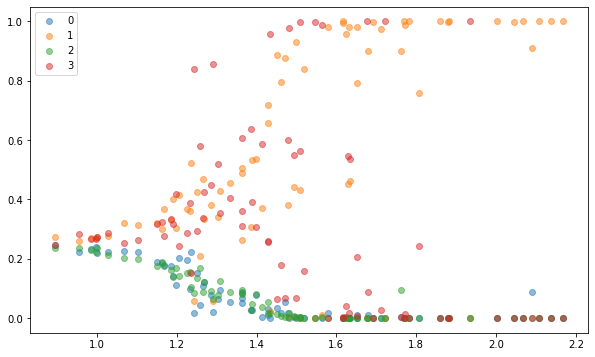

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.scatter(utility.Eta.values, plot_eta_prob[i], label=str(i), alpha=0.5)
    
plt.legend()

In [23]:
plot_gamma_prob = plot_eta_prob

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.scatter(utility.Gamma.values, plot_gamma_prob[i], label=str(i), alpha=0.5)
    
plt.legend()

In [24]:
summary = pd.read_csv('Saved_data/Simulation_records/Summary.csv')

In [25]:
summary.head(20)

Vehicle_label  Road_order  Caused_delay  Count  Total_time
0               0           0      1.758333      6   97.516667
1               0           1      1.350000      6   74.316667
2               0           2      0.000000      8   67.750000
3               0           3      0.000000     80   36.400000
4               1           0      0.000000      1  114.300000
5               1           1      0.000000      1   83.750000
6               1           2      0.000000      1   68.500000
7               1           3      0.000000     97   37.846392
8               2           0      2.450000      1  114.000000
9               2           1      3.050000      1   79.250000
10              2           2      0.000000      1   67.750000
11              2           3      0.000000     97   39.630928
12              3           0      0.000000      3   98.000000
13              3           1      0.000000      7   70.200000
14              3           2      0.000000      9   68.944444
15              3           3      0.000000     81   41.479012
16              4           0      0.000000      1  116.300000
17              4           1      0.000000      1   84.800000
18              4           2      0.000000      1   69.200000
19              4           3      0.000000     97   42.718557